In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import geopandas as gpd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

pd.set_eng_float_format(accuracy=4, use_eng_prefix=True)

import sys
sys.path.append('..')
from src.utils import get_data
from src.clustering import STPClustering

In [2]:
terminals, time_matrix = get_data('../data/')

In [3]:
clustering = STPClustering().fit(time_matrix)
clusters = clustering.predict(max_length=720)

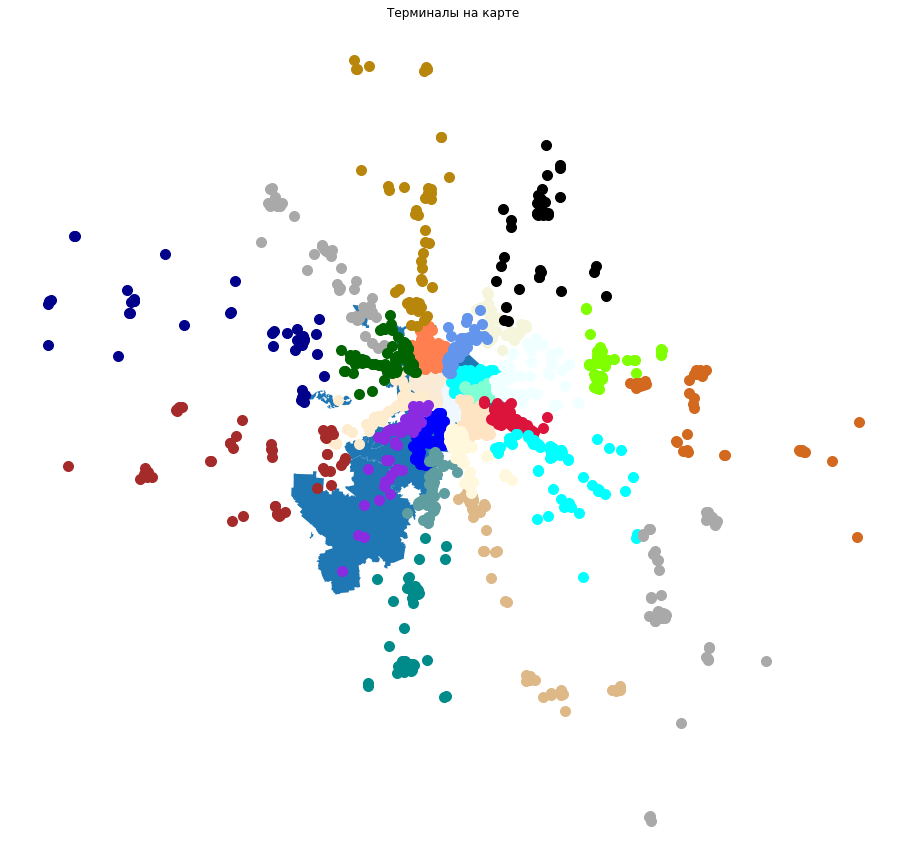

In [4]:
import matplotlib.colors as mcolors


colors = list(mcolors.CSS4_COLORS)
moscow = gpd.read_file('ao-shape.zip')

fig, ax = plt.subplots(figsize=(16, 16))
moscow.plot(ax=ax)

for cluster, color in zip(clusters, colors):
    ax.scatter(terminals['longitude'].iloc[cluster], terminals['latitude'].iloc[cluster], s=100, c=color)

plt.axis('off')
plt.title('Терминалы на карте')
plt.show()